In [193]:
import pandas as pd
from pandas import DataFrame

first_ds = "first_output.csv" # millis 0 = 25/04/2025 00:56
second_ds = "second_output.csv" # millis 0 = 25/04/2025 19:57
third_ds = "third_output.csv" # millis 0 = 27/04/2025 20:00
fourth_ds = "fourth_output.csv" # millis 0 = 29/04/2025 17:00
fifth_ds = "fifth_output.csv" # millis 0 = 30/04/2025 17:45
sixth_ds = "sixth_output.csv" # millis 0 = 12/05/2025 23:20

In [194]:
first_df = pd.read_csv(first_ds)
second_df = pd.read_csv(second_ds)
third_df = pd.read_csv(third_ds)
fourth_df = pd.read_csv(fourth_ds)
fifth_df = pd.read_csv(fifth_ds)
sixth_df = pd.read_csv(sixth_ds)

In [195]:
first_df

,time_ms,soil,light,temp_c
0,3636,1406,1770,21.2
1,240778,1470,960,21.2
2,1140872,1530,844,21.0
3,2041008,1525,959,21.0
4,2941831,1668,895,21.0
...,...,...,...,...
70,62342854,1528,1033,23.8
71,63240824,1630,833,23.7
72,64140824,1533,963,23.6
73,65040049,1580,798,23.7


In [196]:
third_df

,time_ms,soil,light,temp_c
0,848,1535,2559,NaN
1,615,1671,2523,NaN
2,615,1403,2559,NaN
3,900679,1505,1819,23.3
4,1800719,1467,1766,23.3
...,...,...,...,...
177,157508996,1575,4095,22.1
178,158409092,1595,4095,22.1
179,159309132,1584,4095,22.2
180,160209173,1707,4095,22.0


In [197]:
first_start_time = pd.Timestamp("2025-04-25 00:56:00")

second_start_time = pd.Timestamp("2025-04-25 19:57:00")

third_start_time = pd.Timestamp("2025-04-27 20:00:00")

fourth_start_time = pd.Timestamp("2025-04-29 17:00:00")

fifth_start_time = pd.Timestamp("2025-04-30 17:45:00")

sixth_start_time = pd.Timestamp("2025-05-12 23:20:00")

first_df["timestamp"] = first_start_time + pd.to_timedelta(first_df["time_ms"], unit="ms")

second_df["timestamp"] = second_start_time + pd.to_timedelta(second_df["time_ms"], unit="ms")

third_df["timestamp"] = third_start_time + pd.to_timedelta(third_df["time_ms"], unit="ms")

fourth_df["timestamp"] = fourth_start_time + pd.to_timedelta(fourth_df["time_ms"], unit="ms")

fifth_df["timestamp"] = fifth_start_time + pd.to_timedelta(fifth_df["time_ms"], unit="ms")

sixth_df["timestamp"] = sixth_start_time + pd.to_timedelta(sixth_df["time_ms"], unit="ms")

df = pd.concat([first_df, second_df, third_df, fourth_df, fifth_df, sixth_df], axis=0)

df= df[["timestamp", "soil", "light", "temp_c"]]

df = df.sort_values("timestamp")
df

,timestamp,soil,light,temp_c
0,2025-04-25 00:56:03.636,1406,1770,21.2
1,2025-04-25 01:00:00.778,1470,960,21.2
2,2025-04-25 01:15:00.872,1530,844,21.0
3,2025-04-25 01:30:01.008,1525,959,21.0
4,2025-04-25 01:45:01.831,1668,895,21.0
...,...,...,...,...
1222,2025-05-25 16:51:36.079,4095,4095,20.8
1223,2025-05-25 17:06:36.149,4095,4095,20.0
1224,2025-05-25 17:21:36.219,4095,4095,20.1
1225,2025-05-25 17:36:36.289,4095,3442,20.5


In [198]:
df.isna()

,timestamp,soil,light,temp_c
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
1222,False,False,False,False
1223,False,False,False,False
1224,False,False,False,False
1225,False,False,False,False


In [199]:
targets = ("Marchita", "Necesita riego", "Saludable", "Ahogada")

In [200]:
df["target"] = None
df

,timestamp,soil,light,temp_c,target
0,2025-04-25 00:56:03.636,1406,1770,21.2,None
1,2025-04-25 01:00:00.778,1470,960,21.2,None
2,2025-04-25 01:15:00.872,1530,844,21.0,None
3,2025-04-25 01:30:01.008,1525,959,21.0,None
4,2025-04-25 01:45:01.831,1668,895,21.0,None
...,...,...,...,...,...
1222,2025-05-25 16:51:36.079,4095,4095,20.8,None
1223,2025-05-25 17:06:36.149,4095,4095,20.0,None
1224,2025-05-25 17:21:36.219,4095,4095,20.1,None
1225,2025-05-25 17:36:36.289,4095,3442,20.5,None


In [201]:
def assign_target(df, start_timestamp, end_timestamp, label):
    start = pd.to_datetime(start_timestamp)
    end = pd.to_datetime(end_timestamp)


    def set_label(row):
        if start <= pd.to_datetime(row["timestamp"]) < end:
            return label
        return row["target"]

    df["target"] = df.apply(set_label, axis=1)


assign_target(df, "2025-04-25 00:56:00", "2025-04-26 09:00:00", "Saludable")
assign_target(df, "2025-04-26 09:00:00", "2025-04-27 09:00:00", "Necesita riego")
assign_target(df, "2025-04-27 09:00:00", "2025-05-01 09:00:00", "Marchita")
assign_target(df, "2025-05-01 09:00:00", "2025-05-08 09:00:00","Necesita riego")
assign_target(df,"2025-05-08 09:00:00", "2025-05-26 00:00:00", "Saludable")



In [202]:
df = df.reset_index(drop=True)

In [203]:
df.describe()

,timestamp,soil,light,temp_c
count,2799,2799.000000,2799.00000,2791.000000
mean,2025-05-10 08:15:53.187762688,3365.936406,2339.74741,21.257936
min,2025-04-25 00:56:03.636000,913.000000,745.00000,16.300000
25%,2025-05-02 10:07:38.423500032,2015.000000,1008.00000,20.350000
50%,2025-05-09 17:00:46.064000,4095.000000,1571.00000,21.300000
75%,2025-05-18 10:58:11.657999872,4095.000000,4095.00000,22.400000
max,2025-05-25 17:51:36.359000,4095.000000,4095.00000,24.700000
std,NaN,1075.441052,1408.64442,1.389730


In [204]:
rows_with_none = df[df["target"].isna()]
rows_with_none

,timestamp,soil,light,temp_c,target


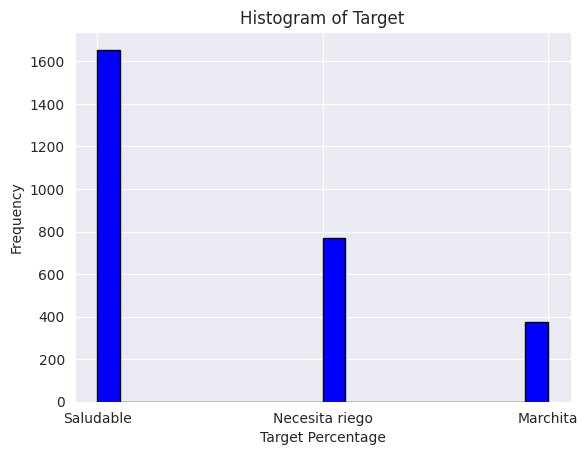

In [205]:
import matplotlib.pyplot as plt

plt.hist(df['target'], bins=20, color='blue', edgecolor='black')
plt.title('Histogram of Target')
plt.xlabel('Target Percentage')
plt.ylabel('Frequency')
plt.show()

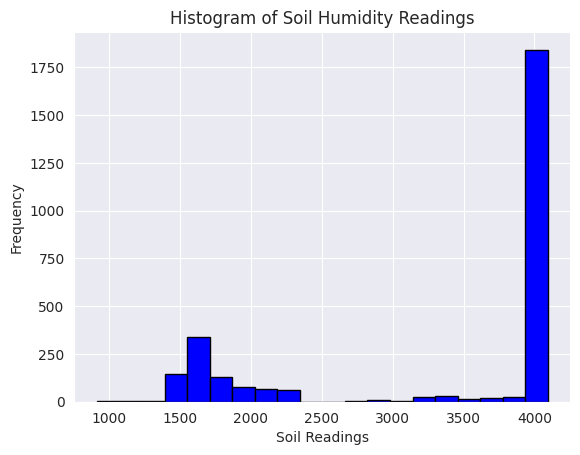

In [206]:
import matplotlib.pyplot as plt

plt.hist(df["soil"], bins=20, color='blue', edgecolor='black')
plt.title('Histogram of Soil Humidity Readings')
plt.xlabel('Soil Readings')
plt.ylabel('Frequency')
plt.show()

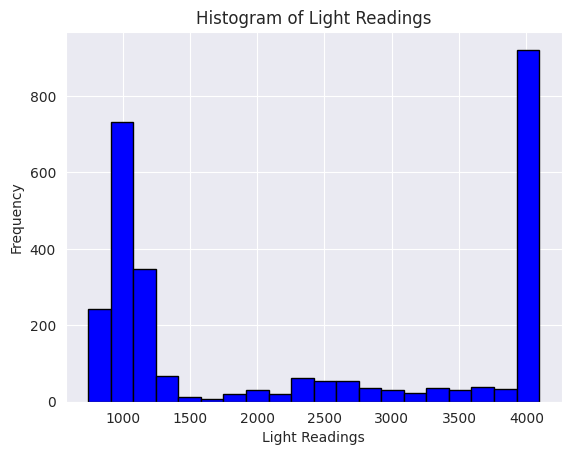

In [207]:
import matplotlib.pyplot as plt

plt.hist(df["light"], bins=20, color='blue', edgecolor='black')
plt.title('Histogram of Light Readings')
plt.xlabel('Light Readings')
plt.ylabel('Frequency')
plt.show()

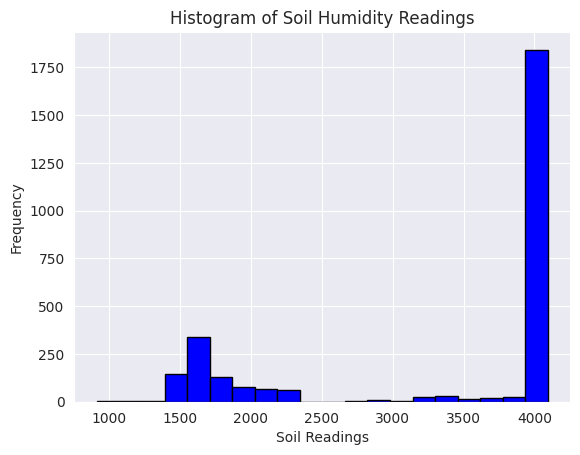

In [208]:
plt.hist(df["soil"], bins=20, color='blue', edgecolor='black')
plt.title('Histogram of Soil Humidity Readings')
plt.xlabel('Soil Readings')
plt.ylabel('Frequency')
plt.show()

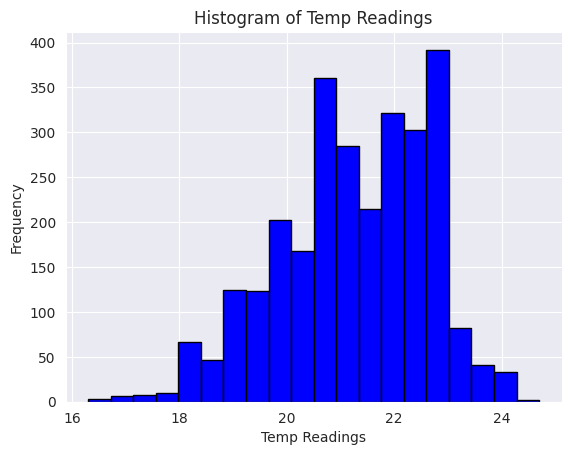

In [209]:
plt.hist(df["temp_c"], bins=20, color='blue', edgecolor='black')
plt.title('Histogram of Temp Readings')
plt.xlabel('Temp Readings')
plt.ylabel('Frequency')
plt.show()

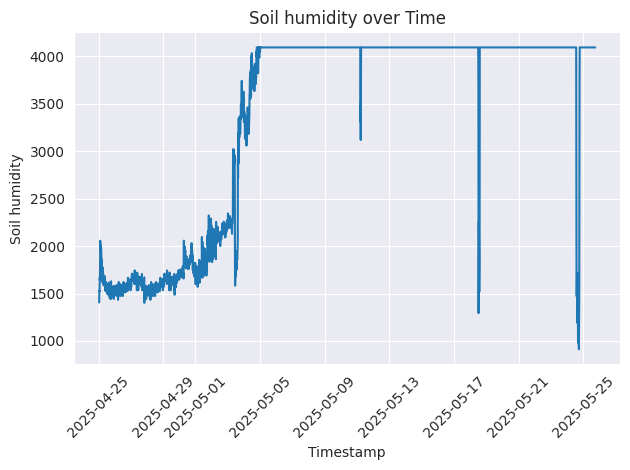

In [210]:
import matplotlib.pyplot as plt

plt.plot(df['timestamp'], df['soil'])
plt.xlabel('Timestamp')
plt.ylabel('Soil humidity')
plt.title('Soil humidity over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

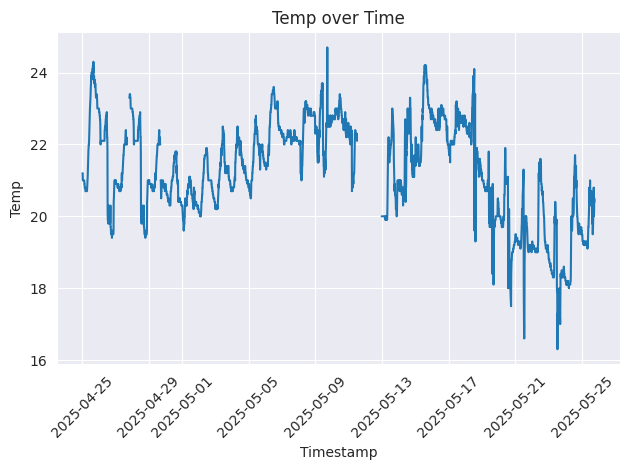

In [211]:
plt.show()
import matplotlib.pyplot as plt

plt.plot(df['timestamp'], df['temp_c'])
plt.xlabel('Timestamp')
plt.ylabel('Temp')
plt.title('Temp over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

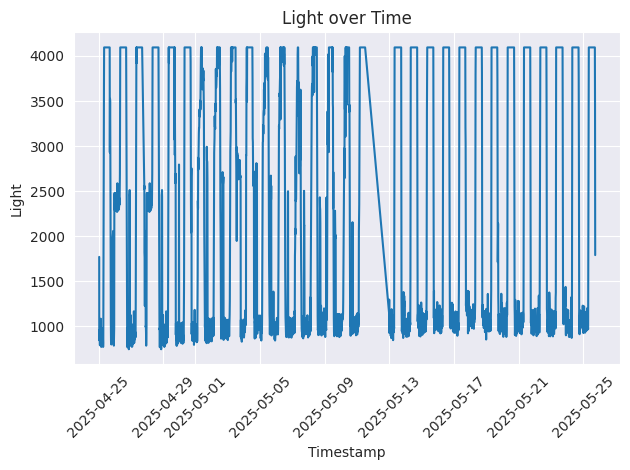

In [212]:
plt.show()
plt.show()
import matplotlib.pyplot as plt

plt.plot(df['timestamp'], df['light'])
plt.xlabel('Timestamp')
plt.ylabel('Light')
plt.title('Light over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [213]:
def map_targets_to_numbers(df):
    mapping = {
        "muerta": 5,
        "marchita": 4,
        "necesita riego": 3,
        "saludable": 2,
        "ahogada": 1
    }
    df["target_num"] = df["target"].str.lower().map(mapping)
map_targets_to_numbers(df)
df

,timestamp,soil,light,temp_c,target,target_num
0,2025-04-25 00:56:03.636,1406,1770,21.2,Saludable,2
1,2025-04-25 01:00:00.778,1470,960,21.2,Saludable,2
2,2025-04-25 01:15:00.872,1530,844,21.0,Saludable,2
3,2025-04-25 01:30:01.008,1525,959,21.0,Saludable,2
4,2025-04-25 01:45:01.831,1668,895,21.0,Saludable,2
...,...,...,...,...,...,...
2794,2025-05-25 16:51:36.079,4095,4095,20.8,Saludable,2
2795,2025-05-25 17:06:36.149,4095,4095,20.0,Saludable,2
2796,2025-05-25 17:21:36.219,4095,4095,20.1,Saludable,2
2797,2025-05-25 17:36:36.289,4095,3442,20.5,Saludable,2


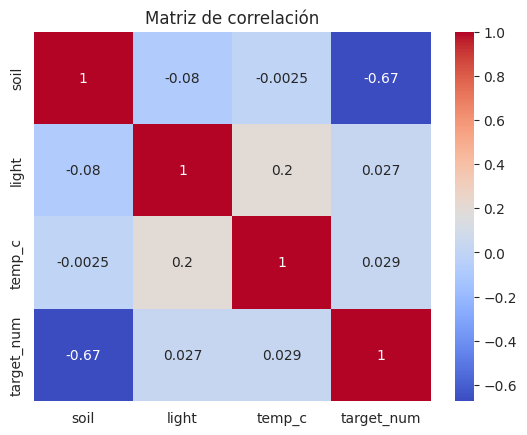

In [214]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation = df[["soil","light","temp_c","target_num"]].corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Matriz de correlación")
plt.show()



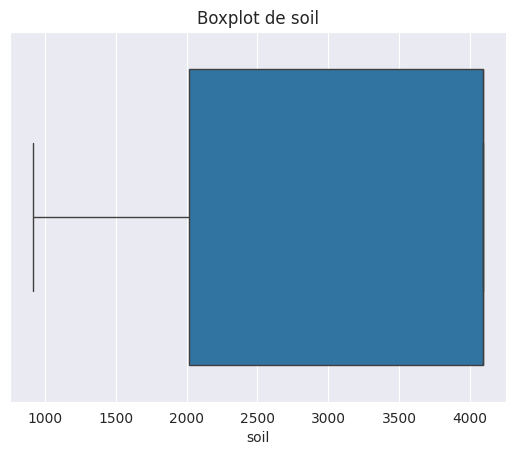

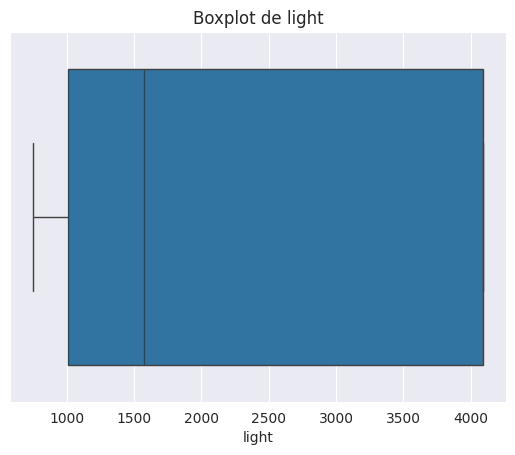

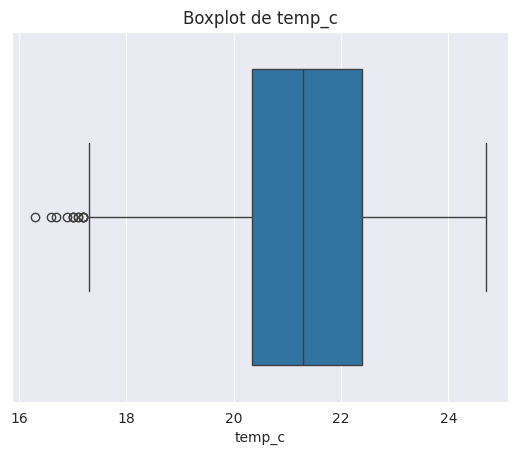

In [215]:
for col in ['soil', 'light', 'temp_c']:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
    plt.show()


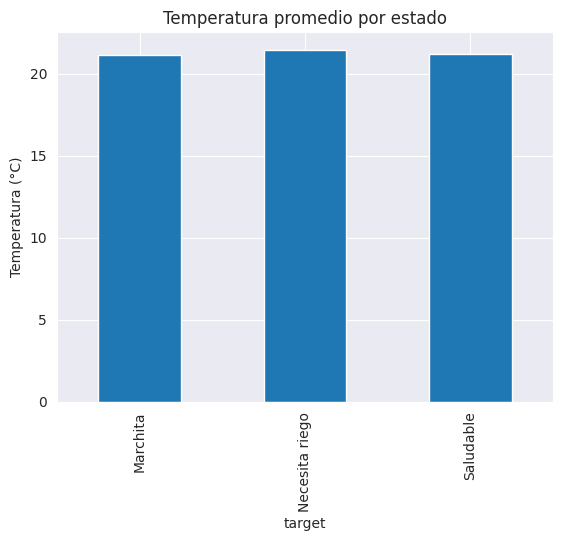

In [216]:
df.groupby('target')['temp_c'].mean().plot(kind='bar')
plt.title('Temperatura promedio por estado')
plt.ylabel('Temperatura (°C)')
plt.show()


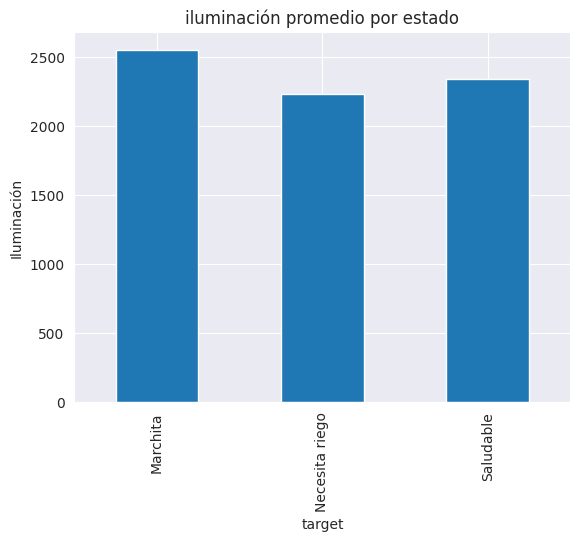

In [217]:
df.groupby('target')['light'].mean().plot(kind='bar')
plt.title('iluminación promedio por estado')
plt.ylabel('Iluminación')
plt.show()

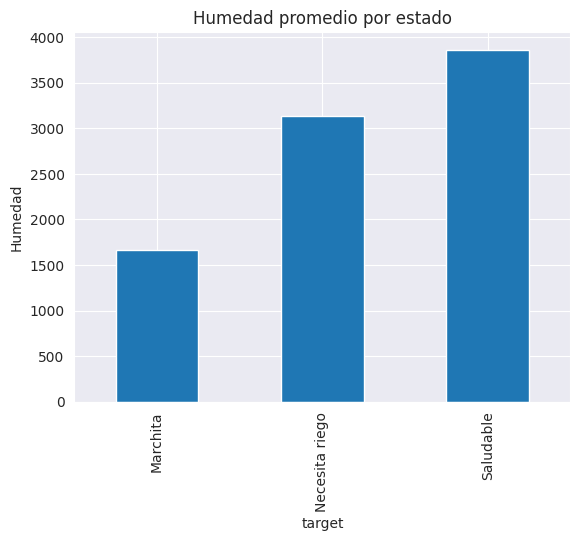

In [218]:
df.groupby('target')['soil'].mean().plot(kind='bar')
plt.title('Humedad promedio por estado')
plt.ylabel('Humedad')
plt.show()

Conclusiones

El dataset refleja una sola tendencia de cambio de estado, únicamente sensamos datos días después de un riego, entonces siempre el estado de la planta en términos de riego fue peor al anterior en el tiempo. Faltaría complementar el mismo con datos de la tendencia contraria (desde ahogada hasta recientemente regada).

La humedad en los 3 estados analizados en promedio presenta valores similares, creemos que esto se debe a que la humedad inicial era un valor cercano a la humedad mínima, por ende prácticamente no ha decrecido en el tiempo, manteniendose baja.

La luz refleja perfectamente la realidad ambiental cada vez que fue sensada. El comportamiento de la temperatura es similar al de la luz. Creemos que esto explica la correlación positiva (0.32) entre ellas. Creemos que tiene sentido ya que al aumentar la luz solar aumenta también la temperatura. Al ver los gráficos de las variables respecto al tiempo notamos que la luz crece drásticamente mientras que la temperatura crece a un ritmo relativamente más líneal en comparación a la anterior. Por este motivo creemos que el valor de la correlación que refleja la matriz es mucho menor al que realmente tienen estas variables.

